In [65]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
%matplotlib inline

In [2]:
dadosConcreto = pd.read_csv('Concrete_data.csv', sep=";", encoding='ISO-8859-1')
dadosConcreto.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
dadosConcreto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast Furnace Slag               1030 non-null float64
Fly Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age (day)                        1030 non-null int64
Concrete compressive strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
dadosConcreto.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


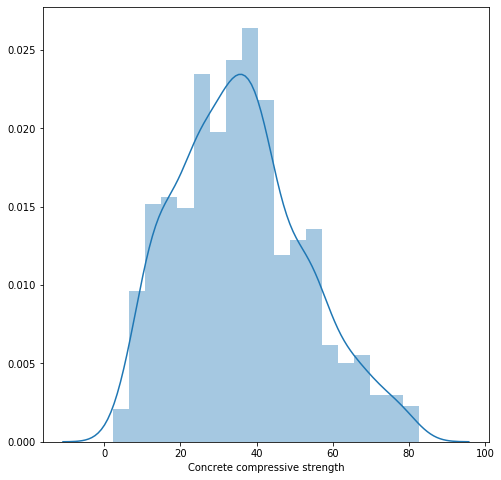

In [5]:
#Distribuição de Concrete compressive strength
f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(dadosConcreto['Concrete compressive strength'])
print()

In [6]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dadosConcreto, size=17):
    corr = dadosConcreto.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

In [7]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
dadosConcreto.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete compressive strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


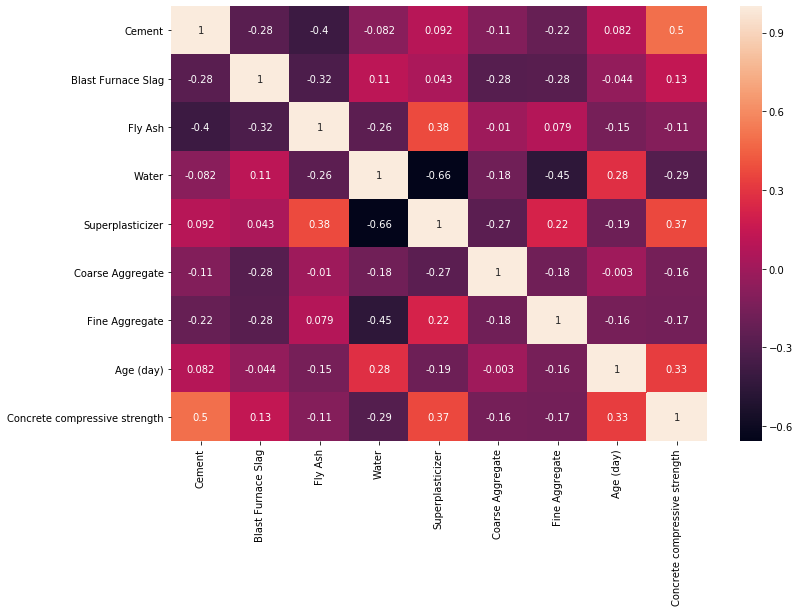

In [8]:
# Criando o gráfico de correlação
plt.figure(figsize=(12,8))
heat_concreto = dadosConcreto.corr()
sns.heatmap(heat_concreto, annot = True)
print()

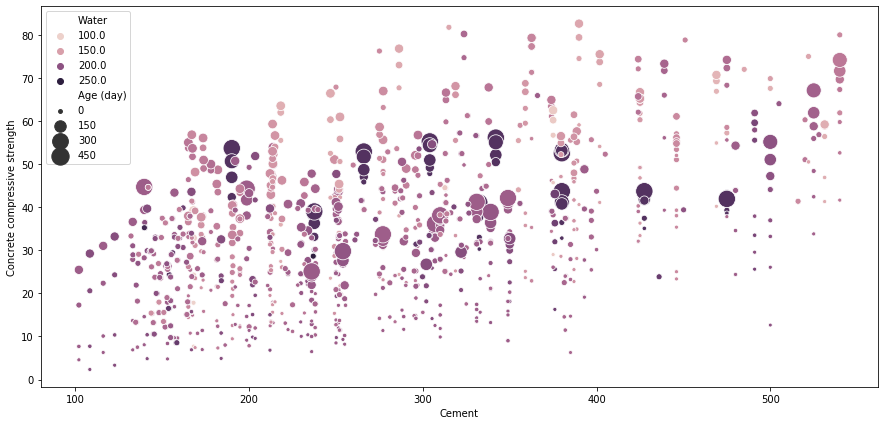

In [9]:
#Concrete compressive strength vs (Cement, Age, Water)
f, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(y="Concrete compressive strength", x="Cement", hue="Water",size="Age (day)",data=dadosConcreto, sizes=(15,300))
print()

#### A resistência à compressão aumenta à medida que a quantidade de cimento aumenta , à medida que os pontos se movem quando avançamos para a direita no eixo x.
#### A resistência à compressão aumenta com a idade (como o tamanho dos pontos representa a idade), esse nem sempre é o caso, mas pode ser de certa forma.
#### Cimento com menos idade requer mais cimento para maior resistência , pois os pontos menores estão subindo quando avançamos para a direita no eixo x.
#### Quanto mais velho o cimento, mais água ele requer , pode ser confirmado observando a cor dos pontos. Pontos maiores com cores escuras indicam alta idade e mais água.
#### A resistência do concreto aumenta quando menos água é usada na preparação, pois os pontos no lado inferior (eixo y) são mais escuros e os pontos na extremidade superior (eixo y) são mais brilhantes.

### Treinando o modelo

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age (day)"]

In [12]:
target = ["Concrete compressive strength"]

In [13]:
# Criando objetos
X = dadosConcreto[atributos].values
Y = dadosConcreto[target].values

In [14]:
X

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [15]:
Y

array([[79.99],
       [61.89],
       [40.27],
       ...,
       [23.7 ],
       [32.77],
       [32.4 ]])

In [16]:
# Definindo a taxa de split
split_test_size = 0.30

In [17]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [18]:
X_treino

array([[ 194.7,    0. ,  100.5, ..., 1006.4,  905.9,   28. ],
       [ 325. ,    0. ,    0. , ..., 1063. ,  783. ,    7. ],
       [ 318.8,  212.5,    0. , ...,  852.1,  880.4,    3. ],
       ...,
       [ 190.3,    0. ,  125.2, ..., 1079. ,  798.9,  100. ],
       [ 475. ,  118.8,    0. , ...,  852.1,  781.5,   28. ],
       [ 314. ,    0. ,  113. , ...,  925. ,  783. ,   28. ]])

In [19]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(dadosConcreto.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(dadosConcreto.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [20]:
X_treino.shape

(721, 8)

In [21]:
X_teste.shape

(309, 8)

### Tratando dados missing

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [24]:
X_treino

array([[ 194.7       ,  137.89566327,  100.5       , ..., 1006.4       ,
         905.9       ,   28.        ],
       [ 325.        ,  137.89566327,  120.57041801, ..., 1063.        ,
         783.        ,    7.        ],
       [ 318.8       ,  212.5       ,  120.57041801, ...,  852.1       ,
         880.4       ,    3.        ],
       ...,
       [ 190.3       ,  137.89566327,  125.2       , ..., 1079.        ,
         798.9       ,  100.        ],
       [ 475.        ,  118.8       ,  120.57041801, ...,  852.1       ,
         781.5       ,   28.        ],
       [ 314.        ,  137.89566327,  113.        , ...,  925.        ,
         783.        ,   28.        ]])

## Construindo e treinando o modelo

### Random Forests Regressor

#### A floresta aleatória é um algoritmo de aprendizado supervisionado que usa o método de aprendizado por conjuntos para classificação e regressão. 
#### Uma floresta aleatória é um meta-estimador (ou seja, combina o resultado de várias previsões) que agrega muitas árvores de decisão. 
#### Não há interação entre essas árvores durante a construção das árvores.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

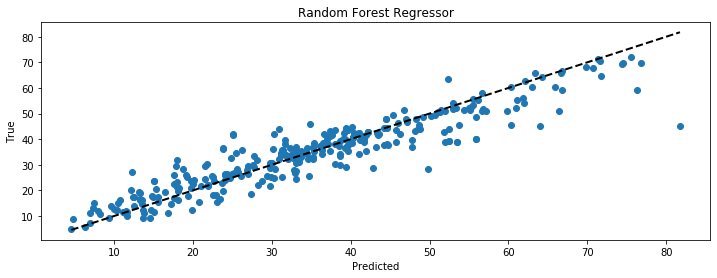

Model				 RMSE 		 R2 		 MAE
Random Forest Regressor 	 6.11 		 0.8619 	 4.25


In [26]:
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_treino, Y_treino.ravel()) 
y_pred_rfr = rfr.predict(X_teste)
f, ax = plt.subplots(figsize=(12, 4))
plt.scatter(Y_teste, y_pred_rfr) 
plt.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'k--', lw=2)
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()
print("Model\t\t\t\t RMSE \t\t R2 \t\t MAE")
print("""Random Forest Regressor \t {:.2f} \t\t {:.4} \t {:.2f}""".format(np.sqrt(mean_squared_error(Y_teste, y_pred_rfr)), r2_score(Y_teste, y_pred_rfr), mean_absolute_error(rfr.predict(X_teste), Y_teste))) 

In [69]:
#Validando MAE para RFR

# Retirando avisos
warnings.filterwarnings('ignore')

# Define the model. Set random_state to 1
forest_model = RandomForestRegressor(random_state=1)

# fit your model
forest_model.fit(X_treino, Y_treino)

# Calculate the mean absolute error of your Random Forest model on the validation data
concreto_preds = forest_model.predict(X_teste)
print(mean_absolute_error(Y_teste, concreto_preds))

4.306985544768069


### Decision Trees

#### Uma árvore de decisão é um mapa dos possíveis resultados de uma série de escolhas relacionadas. 

#### Permite que um indivíduo ou organização compare possíveis ações com base em seus custos, probabilidades e benefícios. 

#### Podem pode ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente.

In [27]:
from sklearn.tree import DecisionTreeRegressor 

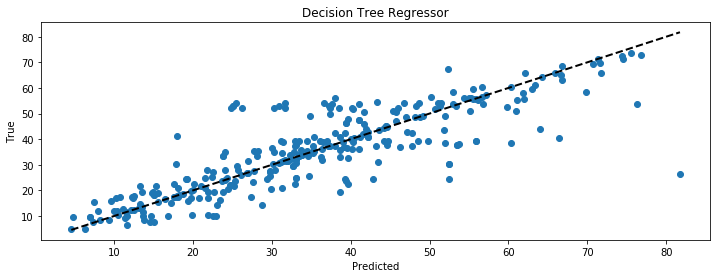

Model				 RMSE 		 R2 		 MAE
Decision Tree Regressor 	 8.95 		 0.7043 	 5.68


In [28]:
#Número de árvores (n_estimator = 10)
dtr = DecisionTreeRegressor() 
dtr.fit(X_treino, Y_treino) 
y_pred_dtr = dtr.predict(X_teste)
f, ax = plt.subplots(figsize=(12, 4))
plt.scatter(Y_teste, y_pred_dtr) 
plt.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor") 
plt.show()
print("Model\t\t\t\t RMSE \t\t R2 \t\t MAE")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.4} \t {:.2f}""".format(np.sqrt(mean_squared_error(Y_teste, y_pred_dtr)), r2_score(Y_teste, y_pred_dtr), mean_absolute_error(dtr.predict(X_teste), Y_teste))) 

In [72]:
#Escrevendo um loop que tente os seguintes valores para max_leaf_nodes a partir de um conjunto de valores possíveis.
#Chamando a função get_mae em cada valor de max_leaf_nodes. 
#Armazene a saída de alguma maneira que permita selecionar o valor de max_leaf_nodes que fornece o modelo mais preciso em seus dados.

def get_mae(max_leaf_nodes, X_treino, X_teste, Y_treino, Y_teste):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_treino, Y_treino)
    preds_val = model.predict(X_teste)
    mae = mean_absolute_error(Y_teste, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 100, 500, 5000, 50000]:
    my_mae = get_mae(max_leaf_nodes, X_treino, X_teste, Y_treino, Y_teste)
    print("Max leaf nodes: {:}  \t\t Mean Absolute Error:  {:}" .format(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  9.46379693090174
Max leaf nodes: 50  		 Mean Absolute Error:  6.540789537613166
Max leaf nodes: 100  		 Mean Absolute Error:  6.124956465835633
Max leaf nodes: 500  		 Mean Absolute Error:  5.859312297734627
Max leaf nodes: 5000  		 Mean Absolute Error:  5.8272168284789645
Max leaf nodes: 50000  		 Mean Absolute Error:  5.8272168284789645


### Regressão Linear

#### Regressão Linear é basicamente uma função de primeiro grau. O objetivo é, dado um conjunto de dados, entender o padrão dentro deles, que possa ser descrito por uma função de primeiro grau, com uma variável.

In [31]:
from sklearn.linear_model import LinearRegression

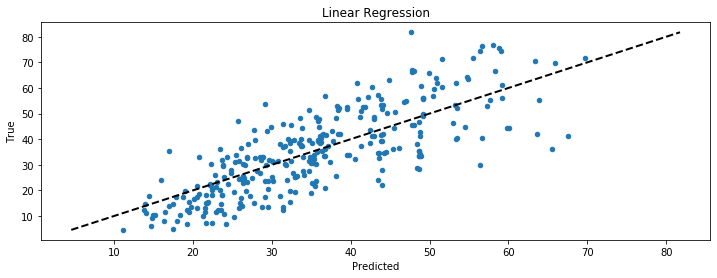

Model				 RMSE 		 R2 		 MAE
Linear Regresson 		 8.95 		 0.7043 	 8.28


In [32]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
y_pred_lr = lr.predict(X_teste)
fig, (ax1) = plt.subplots(figsize=(12,4)) 
ax1.scatter(y_pred_lr, Y_teste, s=20) 
ax1.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression")
plt.show()
print("Model\t\t\t\t RMSE \t\t R2 \t\t MAE")
print("""Linear Regresson \t\t {:.2f} \t\t {:.4} \t {:.2f}""".format(np.sqrt(mean_squared_error(Y_teste, y_pred_dtr)), r2_score(Y_teste, y_pred_dtr), mean_absolute_error(lr.predict(X_teste), Y_teste))) 

## KNeighborsRegressor

#### A regressão baseada em vizinhos pode ser usada nos casos em que os rótulos de dados são contínuos, em vez de variáveis discretas. 
#### O rótulo atribuído a um ponto de consulta é calculado com base na média dos rótulos dos vizinhos mais próximos.

In [33]:
from sklearn.neighbors import KNeighborsRegressor

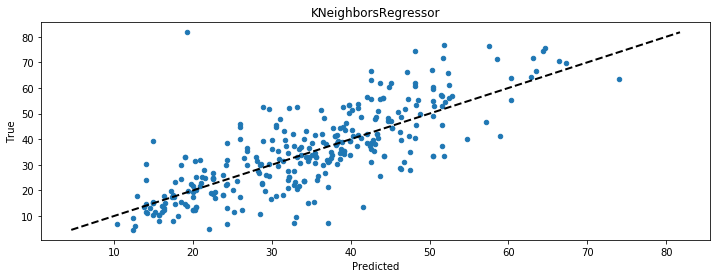

Model				 RMSE 		 R2 		 MAE
KNeighbors Regressor 		 8.95 		 0.7043 	 7.68


In [34]:
knr = KNeighborsRegressor()
knr.fit(X_treino, Y_treino)
y_pred_knr = knr.predict(X_teste)
fig, (ax1) = plt.subplots(figsize=(12,4)) 
ax1.scatter(y_pred_knr, Y_teste, s=20) 
ax1.plot([Y_teste.min(), Y_teste.max()], [Y_teste.min(), Y_teste.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("KNeighborsRegressor")
plt.show()
print("Model\t\t\t\t RMSE \t\t R2 \t\t MAE")
print("""KNeighbors Regressor \t\t {:.2f} \t\t {:.4} \t {:.2f}""".format(np.sqrt(mean_squared_error(Y_teste, y_pred_dtr)), r2_score(Y_teste, y_pred_dtr), mean_absolute_error(knr.predict(X_teste), Y_teste))) 

### Comparando os resultados dos algoritmos

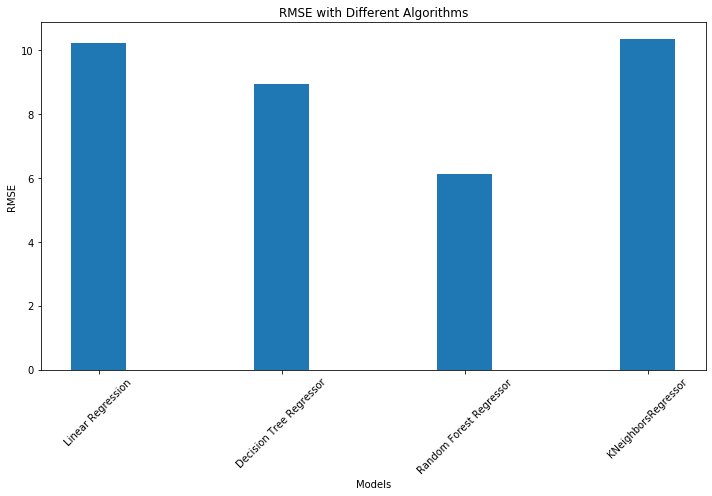

In [35]:
models = [lr, dtr, rfr, knr] 
names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "KNeighborsRegressor"] 
rmses = [] 

for model in models: 
   rmses.append(np.sqrt(mean_squared_error(Y_teste, model.predict(X_teste)))) 

x = np.arange(len(names)) 
width = 0.3
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
fig.tight_layout() 
plt.show()

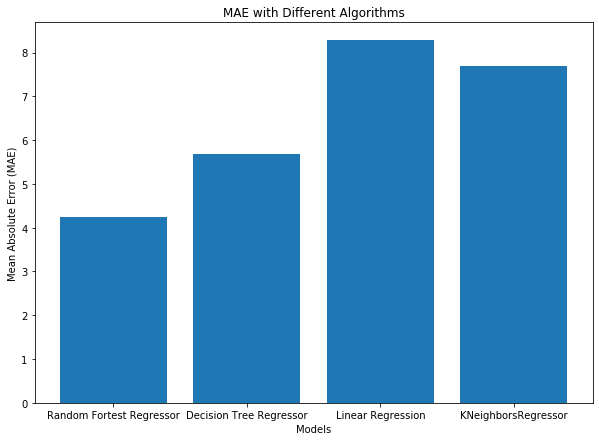

In [36]:
models = ['Random Fortest Regressor', 'Decision Tree Regressor', 'Linear Regression', 'KNeighborsRegressor']
mae = [mean_absolute_error(rfr.predict(X_teste), Y_teste), mean_absolute_error(dtr.predict(X_teste), Y_teste), mean_absolute_error(lr.predict(X_teste), Y_teste), mean_absolute_error(knr.predict(X_teste), Y_teste)]
plt.figure(figsize=(10,7))
plt.bar(models, mae)
plt.xticks(models)
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.title('MAE with Different Algorithms')
print()

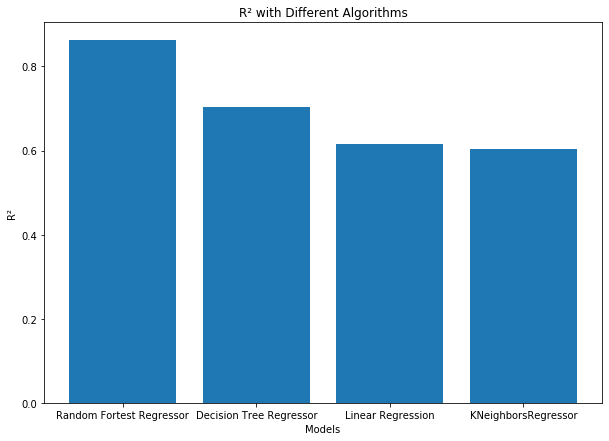

In [37]:
models = ['Random Fortest Regressor', 'Decision Tree Regressor', 'Linear Regression', 'KNeighborsRegressor']
r2 = [r2_score(Y_teste, y_pred_rfr), r2_score(Y_teste, y_pred_dtr), r2_score(Y_teste, y_pred_lr), r2_score(Y_teste, y_pred_knr)]
plt.figure(figsize=(10,7))
plt.bar(models, r2)
plt.xticks(models)
plt.ylabel('R²')
plt.xlabel('Models')
plt.title('R² with Different Algorithms')
print()

#### RMSE -  A Raiz Quadrada do Erro Quadrático Médio — ou simplesmente RMSE em inglês — nada mais é que a diferença entre o valor que foi previsto pelo seu modelo e o valor real que foi observado.
#### R2 - O R², também chamado de Coeficiente de Determinação, diz o quanto meu modelo está prevendo corretamente. 

In [38]:
#Modelo com maior RMSE - KNeighborsRegressor
#Modelo com menor RMSE - Random Forest Regressor

#Modelo com maior R² - Random Fortest Regressor
#Modelo com menor R² - KNeighborsRegressor

#Modelo com maior MAE - LinearRegression
#Modelo com menor MAE - Random Forest Regressor

### Salvando o melhor modelo

In [39]:
import pickle
filename = 'rfr_modelo.sav'
pickle.dump(rfr, open(filename,'wb'))

In [40]:
X_teste

array([[ 266.        ,  114.        ,  119.71633987, ...,  932.        ,
         670.        ,  365.        ],
       [ 362.6       ,  189.        ,  119.71633987, ...,  944.7       ,
         755.8       ,    7.        ],
       [ 389.9       ,  189.        ,  119.71633987, ...,  944.7       ,
         755.8       ,   28.        ],
       ...,
       [ 277.        ,  132.08143713,  119.71633987, ...,  968.        ,
         856.        ,  180.        ],
       [ 475.        ,  132.08143713,  119.71633987, ...,  932.        ,
         594.        ,   28.        ],
       [ 277.2       ,   97.8       ,   24.5       , ..., 1061.7       ,
         782.5       ,   56.        ]])

In [41]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
load_model = pickle.load(open(filename, 'rb'))
resultado1 = load_model.predict(X_teste[15].reshape(1, -1))
resultado2 = load_model.predict(X_teste[100].reshape(1, -1))
print(resultado1)
print(resultado2)

[22.1178]
[34.41163333]
